In [262]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import scale 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA 

In [263]:
df = pd.read_csv('data.csv',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [264]:
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [265]:
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [266]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [267]:
print(df['SEX'].unique())
print(df['MARRIAGE'].unique())

[2 1]
[1 2 3 0]


In [268]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [269]:
len(df)

30000

In [270]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

In [271]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [272]:
len(df)

30000

In [273]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

In [274]:
print(df_no_missing['EDUCATION'].unique())
print(df_no_missing['MARRIAGE'].unique())

[2 1 3 5 4 6]
[1 2 3]


In [275]:
len(df_no_missing)

29932

Downsampling 

In [276]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1] 

In [277]:
df_no_default_downsampled = resample(df_no_default,replace=False,n_samples=1000,random_state=42)
df_default_downsampled = resample(df_default,replace=False,n_samples=1000,random_state=42)
print(len(df_no_default_downsampled))
print(len(df_default_downsampled))

1000
1000


In [278]:
df_downsample = pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

In [279]:
x = df_default.drop(['DEFAULT'],axis=1).copy()
x.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
13,70000,1,2,2,30,1,2,2,0,0,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
16,20000,1,1,2,24,0,0,2,2,2,...,17428,18338,17905,19104,3200,0,1500,0,1650,0
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,316,0,632,316,316,316,0,632,316,0


In [280]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

One Hot Encoding 

In [281]:
pd.get_dummies(x,columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,True,False,False
1,120000,2,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,False,True,False
13,70000,1,2,30,1,2,2,0,0,2,...,36894,3200,0,3000,3000,1500,0,False,True,False
16,20000,1,1,24,0,0,2,2,2,2,...,19104,3200,0,1500,0,1650,0,False,True,False
21,120000,2,2,39,-1,-1,-1,-1,-1,-1,...,316,316,316,0,632,316,0,True,False,False


In [282]:
x_encoded = pd.get_dummies(x, columns=['MARRIAGE'])
x_encoded.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,True,False,False
1,120000,2,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,False,True,False
13,70000,1,2,30,1,2,2,0,0,2,...,36894,3200,0,3000,3000,1500,0,False,True,False
16,20000,1,1,24,0,0,2,2,2,2,...,19104,3200,0,1500,0,1650,0,False,True,False
21,120000,2,2,39,-1,-1,-1,-1,-1,-1,...,316,316,316,0,632,316,0,True,False,False


In [283]:
x_encoded = pd.get_dummies(x, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6',])
x_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,True,False,False,False,False,False,False,False,False,False
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,False,False,False,True,False,False,False,False,False,False
13,70000,30,65802,67369,65701,66782,36137,36894,3200,0,...,False,False,False,True,False,False,False,False,False,False
16,20000,24,15376,18010,17428,18338,17905,19104,3200,0,...,False,False,False,True,False,False,False,False,False,False
21,120000,39,316,316,316,0,632,316,316,316,...,False,True,False,False,False,False,False,False,False,False


In [284]:
print(x_encoded.shape)
print(y.shape)
x_encoded_subset = resample(x_encoded, n_samples=2000, random_state=42)
print(x_encoded_subset.shape)
print(y.shape)

(6631, 88)
(2000,)
(2000, 88)
(2000,)


Centering and scaling data 

In [285]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded_subset,y,random_state=42)
x_trained_scaled = scale(x_train)
x_test_scaled = scale(x_test) 

SVM

In [286]:
clf_svm = SVC(random_state=42)
clf_svm.fit(x_trained_scaled,y_train)

SVC(random_state=42)

In [287]:
y_pred = clf_svm.predict(x_trained_scaled)

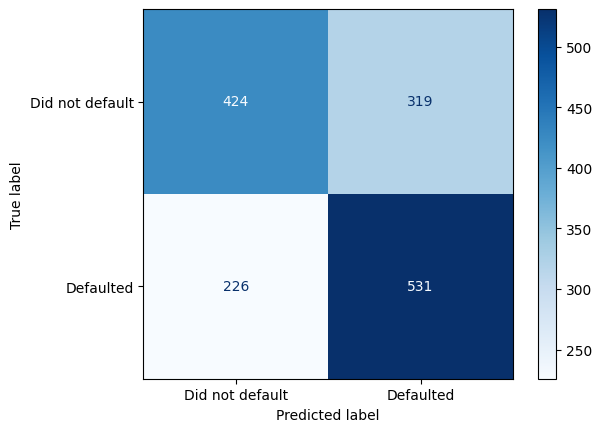

In [288]:
conf_matrix = confusion_matrix(y_train,y_pred)
class_names = ['Did not default', 'Defaulted']
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

Optimize the parameters with cross validation and GridSearchCV 

In [289]:
#Finding the best value for gamma and C
param_grid  = [{'C':[0.5,1,10,100],
                'gamma':['scale',1,0.1,0.01,0.001,0.0001],
                'kernel':['rbf']}]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)
optimal_params.fit(x_trained_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


Evaluating SVM with the best parameters

In [290]:
clf_svm = SVC(random_state=42,C=10,gamma=0.001)
clf_svm.fit(x_trained_scaled,y_train)

SVC(C=10, gamma=0.001, random_state=42)

There is a problem while downsampling the data

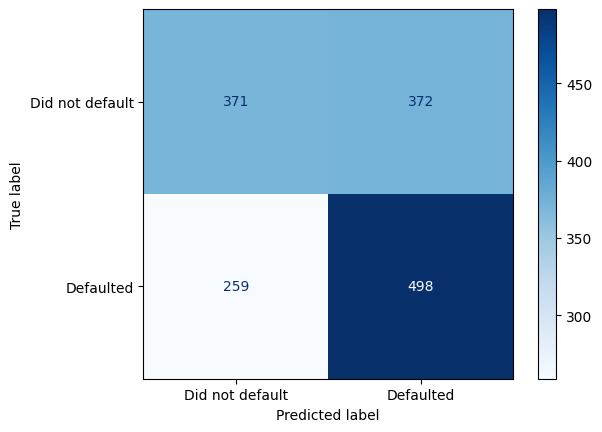

In [291]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the clf_svm model as you mentioned
# Use the trained classifier to make predictions on the training data
y_pred = clf_svm.predict(x_trained_scaled)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Define class labels (optional)
class_names = ['Did not default', 'Defaulted']

# Create a ConfusionMatrixDisplay object and display it
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
display.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


PCA (Principal Component analysis) is used to combine 24 features into 2 orthagonal meta features. Essentially we can shrink 24-D graph to 2-D graph

In [292]:
len(df_downsample.columns)

24

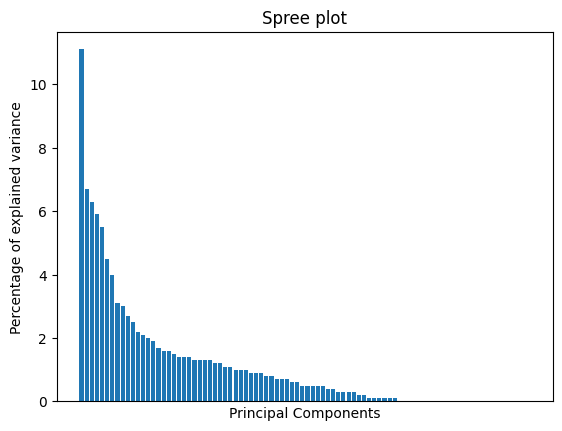

In [293]:
pca = PCA()
x_train_pca = pca.fit_transform(x_trained_scaled)
per_var  = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var) + 1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Components')
plt.title('Spree plot')
plt.show()
#We want the first 2 components to be the tallest
#This approximation isnt great